PROBLEM:

**Title: marketing campaign**

**Introduction:**
This report highlights a project that applied data science techniques to real-life marketing challenges. By utilizing Python and its best libraries, we aimed to explore the general applicability of data science and its practicality. Our objective was to conduct exploratory data analysis and hypothesis testing to gain a deeper understanding of the factors influencing customer acquisition.

**Problem Context:**
The marketing mix, encompassing product, pricing, distribution, and promotion, is crucial for effective marketing strategies. However, extracting valuable insights from large marketing datasets can be daunting without data science techniques.

**Problem Objective:**
Our project focused on leveraging data science methodologies, using Python's capabilities and top libraries, to conduct exploratory analysis and hypothesis testing. Our aim was to enhance our understanding of the diverse factors impacting customer acquisition.

**Collaborative Approach:**
Through collaboration between data scientists and marketing professionals, we bridged the gap between data analysis and practical marketing implementation. This approach ensured that our analytical findings aligned with real-world marketing goals, leading to actionable recommendations and strategies.

In this report, we will discuss the methodology, datasets, and key insights derived from the exploratory analysis and hypothesis testing. These findings have the potential to significantly improve customer acquisition and contribute to the success of marketing initiatives.


In [ ]:
from IPython.display import Image
Image(url='https://www.connectmor.io/wp-content/uploads/2022/01/1BfVRE2ohxhEYD3_L9OK0YA.jpeg')

## Step 0: Import libraries




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Step 1: Import Data




In [ ]:
df=pd.read_csv('/content/marketing_data.csv')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

## Step 2: Data Cleaning + Preprocessing

In [ ]:
# Clean up column names that contain whitespace
df.columns = df.columns.str.strip()
#df.columns = df.columns.str.replace(' ', '')

df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

# Transform income column to a numerical
df['Income'] = df['Income'].str.replace(',','').str.replace('$','').astype('float')
#df['Income'] = df['Income'].str.replace(r'\D', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

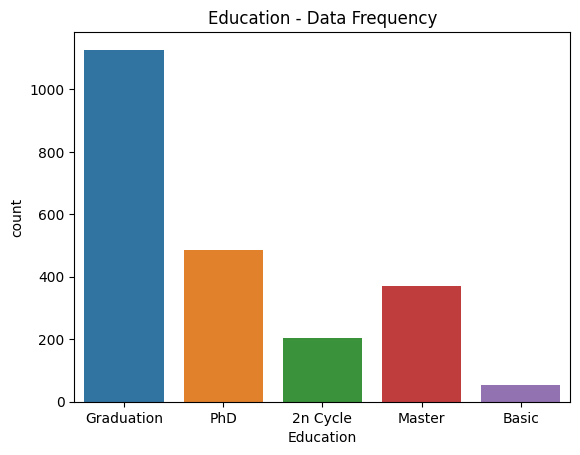

Number of samples According to Education 
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [ ]:
# Number of samples according to Education
sns.countplot(x="Education", data=df)
plt.xticks(rotation = 0)
plt.title("Education - Data Frequency")
plt.show()
print(f"Number of samples According to Education \n{df['Education'].value_counts()}")

In [ ]:
# Replace '2n cycle' with 'master'
df['Education'] = df['Education'].apply(lambda x: 'Master' if str(x) == '2n Cycle' else str(x))
# Replace 'graduation' with 'undergraduate'
df['Education'] = df['Education'].apply(lambda x: 'Undergraduate' if str(x) == 'Graduation' else str(x))

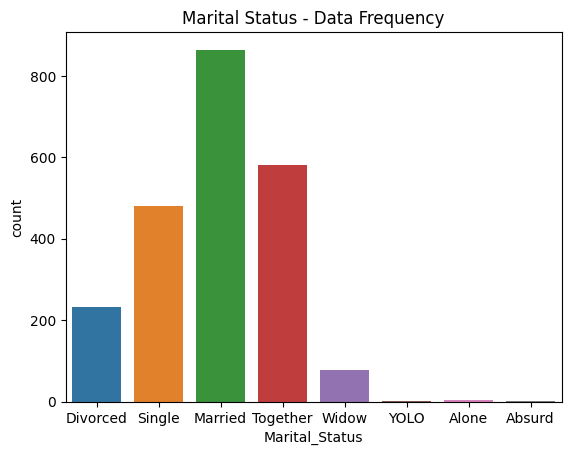

Number of samples According to Marital status 
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64


In [ ]:
# Number of samples according to Marital status
sns.countplot(x="Marital_Status", data=df)
plt.xticks(rotation = 0)
plt.title("Marital Status - Data Frequency")
plt.show()
print(f"Number of samples According to Marital status \n{df['Marital_Status'].value_counts()}")

In [ ]:
# change the names of Alone , yolo , Absurd to single
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['Alone', 'YOLO', 'Absurd'] else str(x))

In [ ]:
df['Country'].value_counts()

SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [ ]:
import datetime
# Age from birthyear
df['Age'] = datetime.datetime.now().year - df['Year_Birth']
# Total number of dependents in the household
df['Children_Count'] = df['Kidhome'] + df['Teenhome']
# Total spending
df['TotalSpending'] = df[['NumDealsPurchases', 'NumWebPurchases' ,'NumCatalogPurchases' ,'NumStorePurchases']].count

df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age',
       'Children_Count', 'TotalSpending'],
      dtype='object')

## Step 3: EDA

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Response,Complain,Age,Children_Count,Education1,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.852232,51529.024819,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.149107,0.009375,54.194196,0.950446,0.800893,0.103571,0.385714,0.217411,0.258929,0.034375
std,3246.662198,11.771725,20350.766690,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.356274,0.096391,11.984069,0.751803,0.903370,0.304772,0.486872,0.412576,0.438144,0.182231
min,0.000000,1932.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,53.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,64.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,11191.000000,1996.000000,85131.500000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,130.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.head(5)

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Country,Age,Children_Count,TotalSpending,Education1,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1826,1970,Undergraduate,84835.0,0,0,2014-06-16,0,189,104,...,SP,53,0,<bound method DataFrame.count of NumDeal...,0.0,1,0,0,0,0
1,1,1961,Undergraduate,57091.0,0,0,2014-06-15,0,464,5,...,CA,62,0,<bound method DataFrame.count of NumDeal...,0.0,0,0,1,0,0
2,10476,1958,Undergraduate,67267.0,0,1,2014-05-13,0,134,11,...,US,65,1,<bound method DataFrame.count of NumDeal...,0.0,0,1,0,0,0
3,1386,1967,Undergraduate,32474.0,1,1,2014-05-11,0,10,0,...,AUS,56,2,<bound method DataFrame.count of NumDeal...,0.0,0,0,0,1,0
4,5371,1989,Undergraduate,21474.0,1,0,2014-04-08,0,6,16,...,SP,34,1,<bound method DataFrame.count of NumDeal...,0.0,0,0,1,0,0


In [ ]:
#histgrome /////
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Children_Count,TotalSpending
0,1826,1970,Undergraduate,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,SP,53,0,<bound method DataFrame.count of NumDeal...
1,1,1961,Undergraduate,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,CA,62,0,<bound method DataFrame.count of NumDeal...
2,10476,1958,Undergraduate,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,65,1,<bound method DataFrame.count of NumDeal...
3,1386,1967,Undergraduate,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,AUS,56,2,<bound method DataFrame.count of NumDeal...
4,5371,1989,Undergraduate,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,SP,34,1,<bound method DataFrame.count of NumDeal...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,0,0,0,0,0,0,US,47,1,<bound method DataFrame.count of NumDeal...
2236,5263,1977,Master,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,0,0,0,SP,46,1,<bound method DataFrame.count of NumDeal...
2237,22,1976,Undergraduate,Divorced,46310.0,1,0,2012-12-03,99,185,...,0,0,0,0,0,0,SP,47,1,<bound method DataFrame.count of NumDeal...
2238,528,1978,Undergraduate,Married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,0,0,0,IND,45,0,<bound method DataFrame.count of NumDeal...


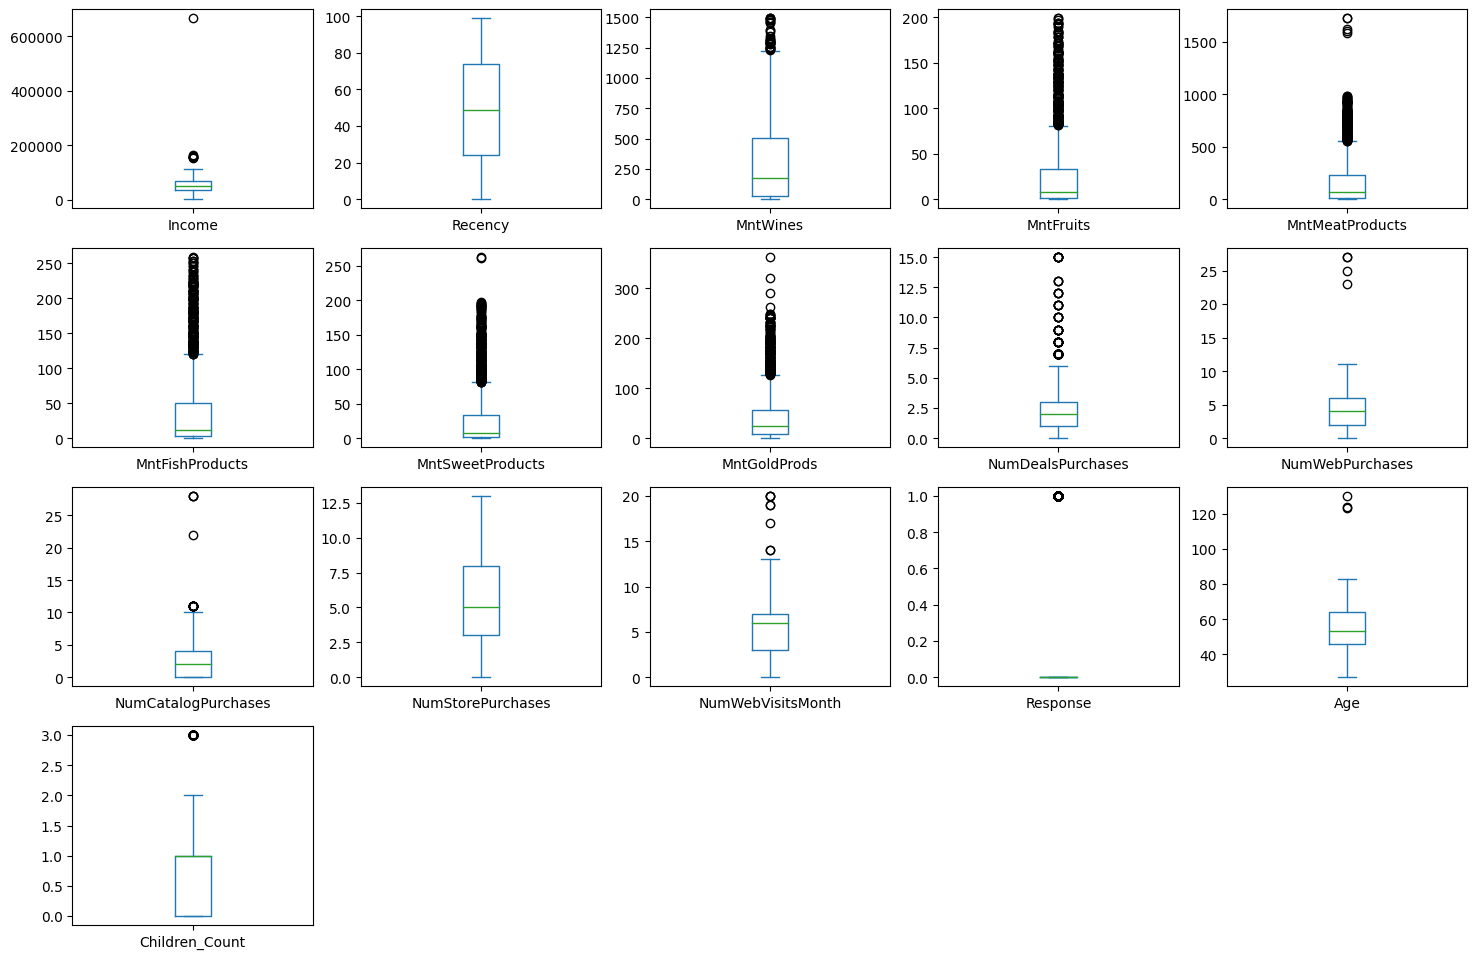

In [ ]:
df2 = df.drop(['ID', 'Year_Birth','Kidhome','Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain'],axis=1)
numeric_cols = df2.select_dtypes(include=['number']).columns
df[numeric_cols].plot(subplots=True, layout=(5,5), kind='box', figsize=(18,15))
plt.show()


<Axes: >

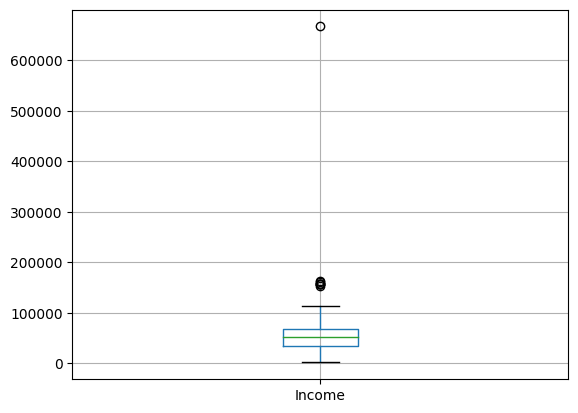

In [ ]:
df.boxplot('Income')

<Axes: >

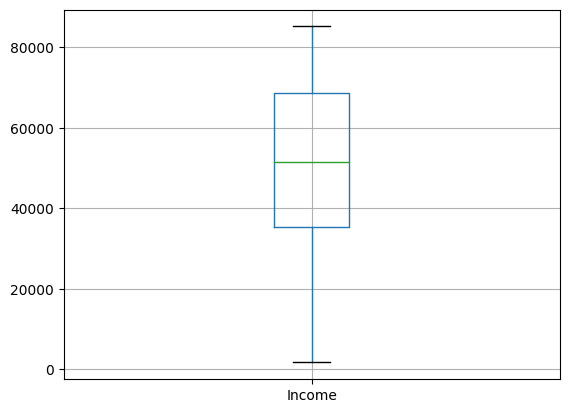

In [ ]:
#Removing outliers from income
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q1 + 1.5*IQR
df['Income'].mask(df['Income'] > UB, UB, inplace=True)
df.boxplot('Income')

# df = df.drop(df[df['Year_Birth'] <= 1900].index)
# df = df.drop(df[df['Income'] > 600000].index)

<Axes: >

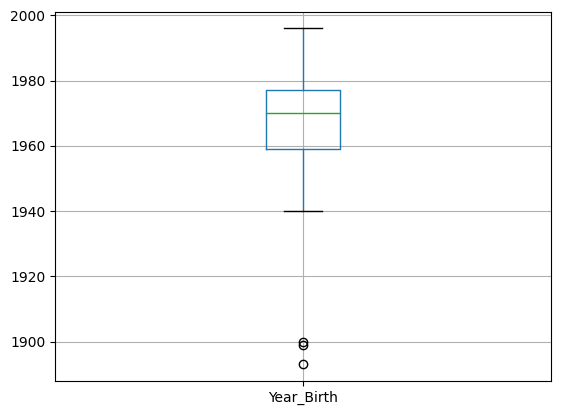

In [ ]:
df.boxplot('Year_Birth')

<Axes: >

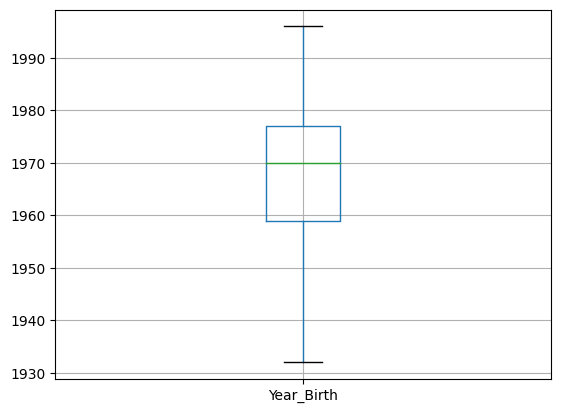

In [ ]:
#Removing outliers from year of birth
Q1 = df['Year_Birth'].quantile(0.25)
Q3 = df['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q1 + 1.5*IQR
df['Year_Birth'].mask(df['Year_Birth'] < LB, LB, inplace=True)
df.boxplot('Year_Birth')

<Axes: xlabel='Income', ylabel='Density'>

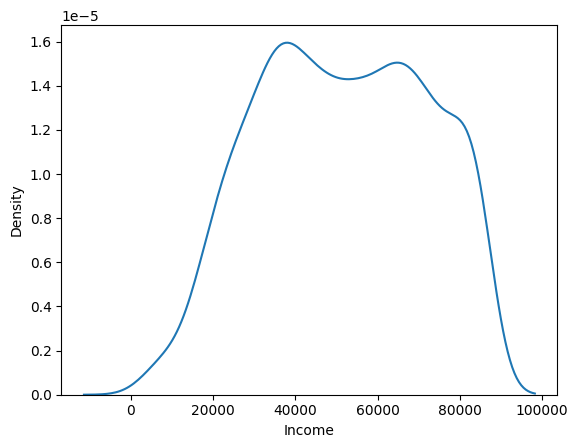

In [ ]:
# Distribution of Income
sns.kdeplot(data=df, x="Income")

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age',
       'Children_Count', 'TotalSpending'],
      dtype='object')

In [ ]:
df.Education.unique().tolist()

['Undergraduate', 'PhD', 'Master', 'Basic']

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Children_Count,TotalSpending
0,1826,1970,Undergraduate,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,SP,53,0,<bound method DataFrame.count of NumDeal...
1,1,1961,Undergraduate,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,CA,62,0,<bound method DataFrame.count of NumDeal...
2,10476,1958,Undergraduate,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,65,1,<bound method DataFrame.count of NumDeal...
3,1386,1967,Undergraduate,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,AUS,56,2,<bound method DataFrame.count of NumDeal...
4,5371,1989,Undergraduate,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,SP,34,1,<bound method DataFrame.count of NumDeal...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,0,0,0,0,0,0,US,47,1,<bound method DataFrame.count of NumDeal...
2236,5263,1977,Master,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,0,0,0,SP,46,1,<bound method DataFrame.count of NumDeal...
2237,22,1976,Undergraduate,Divorced,46310.0,1,0,2012-12-03,99,185,...,0,0,0,0,0,0,SP,47,1,<bound method DataFrame.count of NumDeal...
2238,528,1978,Undergraduate,Married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,0,0,0,IND,45,0,<bound method DataFrame.count of NumDeal...


## Step 4: Testing

In [ ]:
# Ordinal encoding for 'Education'
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

data = pd.DataFrame({"Levels":df.Education.unique().tolist()})
encoder = OrdinalEncoder(categories=[df.Education.unique().tolist()])
df['Education1']=encoder.fit_transform(df[['Education']])
print(encoder.categories_)

# for categorical variables use OneHotEncoder
df = pd.get_dummies(df, columns=[ "Marital_Status"])
df.head(3)

[array(['Undergraduate', 'PhD', 'Master', 'Basic'], dtype=object)]


,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Country,Age,Children_Count,TotalSpending,Education1,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1826,1970,Undergraduate,84835.0,0,0,2014-06-16,0,189,104,...,SP,53,0,<bound method DataFrame.count of NumDeal...,0.0,1,0,0,0,0
1,1,1961,Undergraduate,57091.0,0,0,2014-06-15,0,464,5,...,CA,62,0,<bound method DataFrame.count of NumDeal...,0.0,0,0,1,0,0
2,10476,1958,Undergraduate,67267.0,0,1,2014-05-13,0,134,11,...,US,65,1,<bound method DataFrame.count of NumDeal...,0.0,0,1,0,0,0


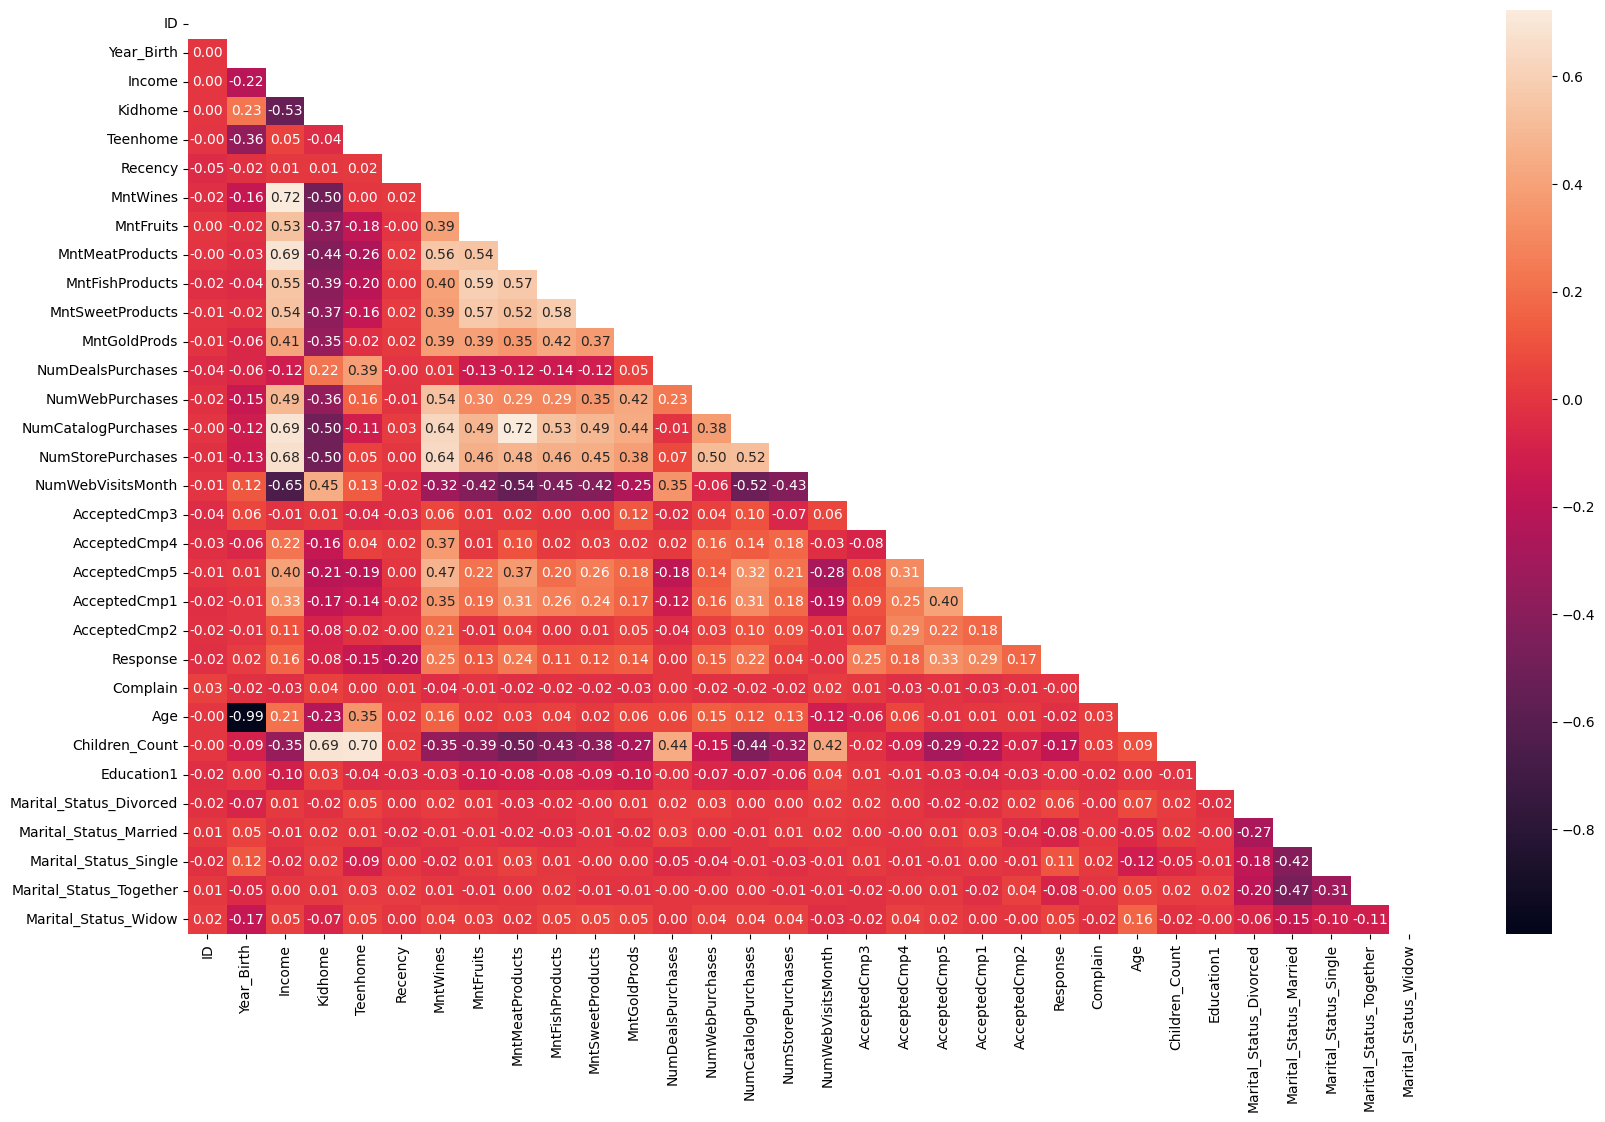

In [ ]:
# lets check the correlation between variables through heatmap
corr = df.corr()
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True,fmt='.2f' , mask=mask)
plt.show()

In [ ]:
# lets check the highest correlation
df.corr()['Response'].sort_values(ascending=False)

Response                   1.000000
AcceptedCmp5               0.326634
AcceptedCmp1               0.293982
AcceptedCmp3               0.254258
MntWines                   0.247254
MntMeatProducts            0.236335
NumCatalogPurchases        0.220810
AcceptedCmp4               0.177019
AcceptedCmp2               0.169293
Income                     0.161764
NumWebPurchases            0.148730
MntGoldProds               0.139850
MntFruits                  0.125289
MntSweetProducts           0.117372
MntFishProducts            0.111331
Marital_Status_Single      0.110555
Marital_Status_Divorced    0.055147
Marital_Status_Widow       0.051723
NumStorePurchases          0.039363
Year_Birth                 0.020058
NumDealsPurchases          0.002238
Complain                  -0.001707
Education1                -0.003467
NumWebVisitsMonth         -0.003987
Age                       -0.021325
ID                        -0.021968
Marital_Status_Together   -0.075770
Marital_Status_Married    -0

In [ ]:
pip install dython

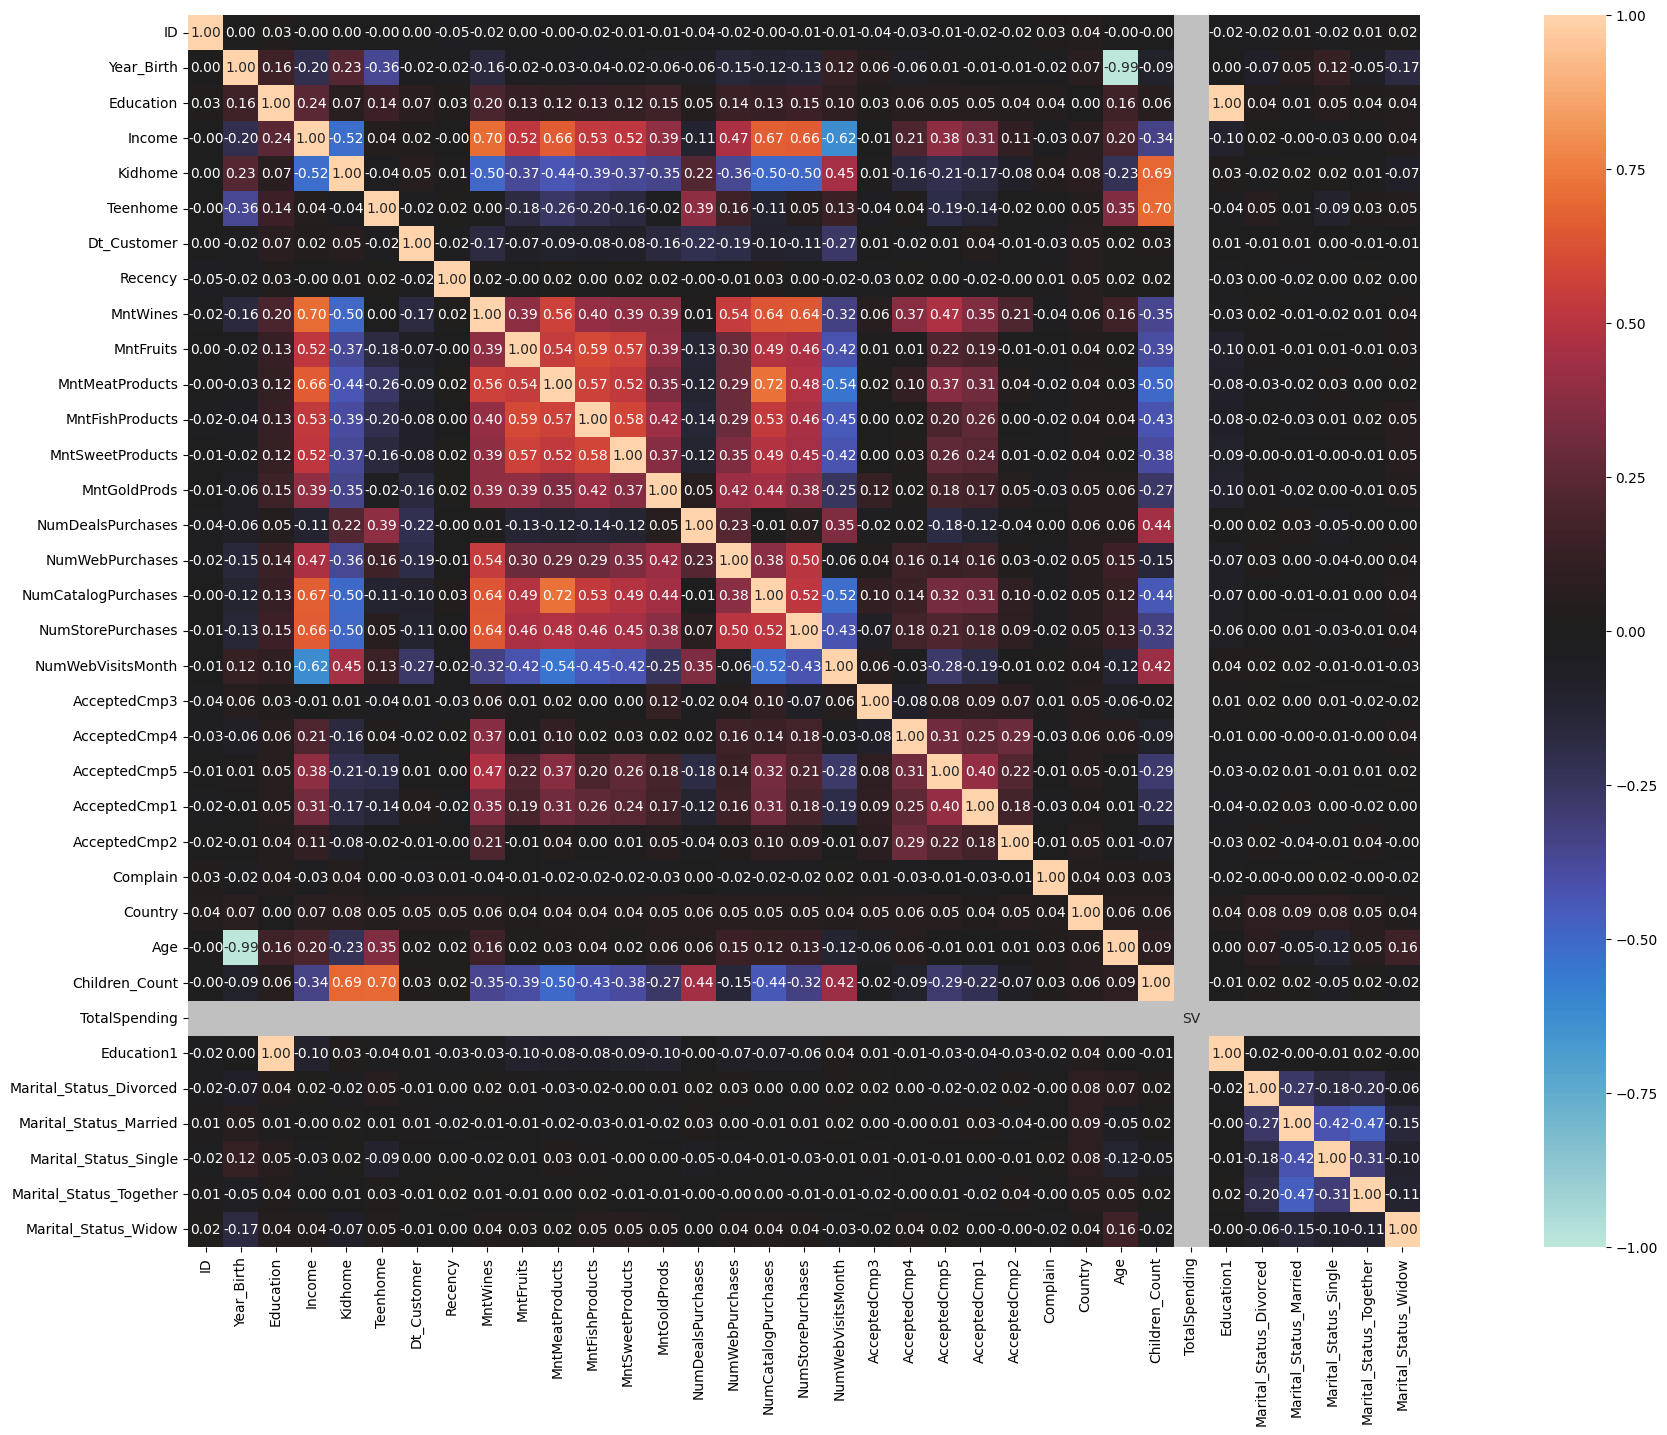

In [ ]:
X = df.drop('Response', axis = 1)
from dython.nominal import associations
complete_correlation = associations(X, figsize = (32, 16))

## Step 5: Analysis

**1- Older people are not as tech-savvy and probably prefer shopping in-store.**


In [ ]:
# hypthosis
df_age=df[['Age','NumWebPurchases','NumStorePurchases']]


df_age.loc[(df_age['Age'] <= 25) , 'Age_Group'] = 'Young'
df_age.loc[(df_age['Age']  > 50) , 'Age_Group'] = 'Elderly'
df_age.loc[(df_age['Age']  > 25) & (df_age['Age'] <= 50) , 'Age_Group'] = 'Middle Age'


df_age.head()

,Age,NumWebPurchases,NumStorePurchases,Age_Group
0,53,4,6,Elderly
1,62,7,7,Elderly
2,65,3,5,Elderly
3,56,1,2,Elderly
4,34,3,2,Middle Age


In [ ]:
df_age_plot=df_age[["Age_Group", 'NumWebPurchases','NumStorePurchases']].groupby(["Age_Group"]).sum() # Age_Group as an index for plotting .reset_index()
df_age_plot.head()

,NumWebPurchases,NumStorePurchases
Age_Group,,
Elderly,5795,8075
Middle Age,3355,4895


<Axes: xlabel='Age_Group'>

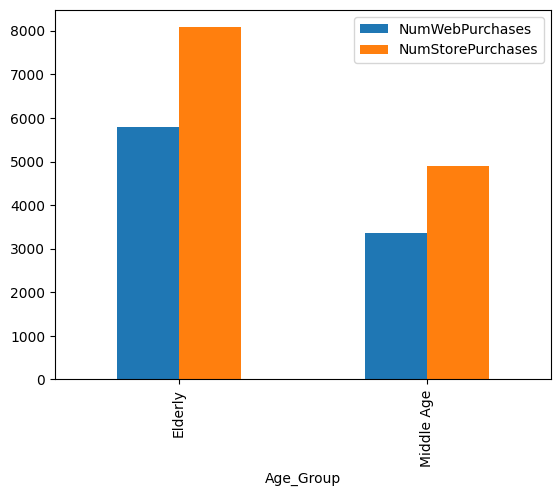

In [ ]:
df_age_plot.plot.bar()

**Older people have more instore purchases than online purchases**

**2- Customers with kids probably have less time to visit a store and would prefer to shop online.**

In [ ]:
# customer hypthosis
df_kids=df[['Children_Count','NumWebPurchases','NumStorePurchases']]
df_kids_plot= df_kids.groupby(["Children_Count"]).sum() #.reset_index()
df_kids_plot.head()

,NumWebPurchases,NumStorePurchases
Children_Count,,
0,2803,4635
1,4834,6310
2,1361,1815
3,152,210


<Axes: xlabel='Children_Count'>

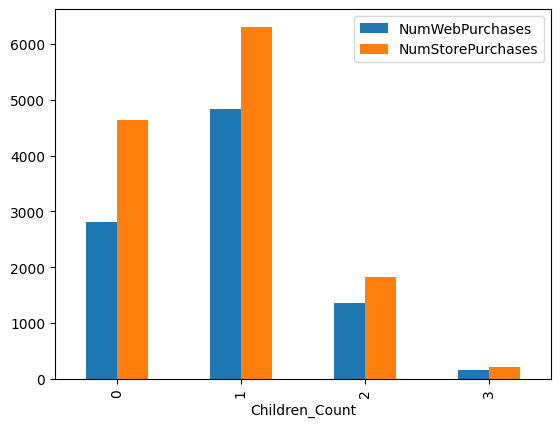

In [ ]:
df_kids_plot.plot.bar()

**Parents with 2 or more children seem spending very less in shopping. These categories of parents prefer shopping instore however increasing trend is noticed on online purchases among these parents**

**3- Other distribution channels may cannibalize sales at the store.**





([<matplotlib.patches.Wedge at 0x7d391d486350>,
 [Text(0.9698058573993448, 0.5191113550616302, 'Deals'),
  Text(-0.29933747437362795, 1.0584881087832863, 'Online'),
  Text(-1.090577484984908, -0.14366888752960116, 'Catalog'),
  Text(0.3739290163314566, -1.0344936397800566, 'Instore')])

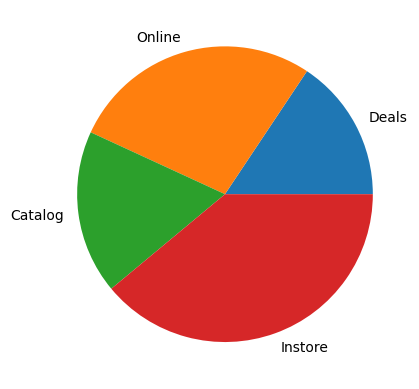

In [ ]:
#here is 3 hypthosis
labels = ['Deals','Online','Catalog','Instore']
sizes = [df.NumDealsPurchases.sum(),
         df.NumWebPurchases.sum(),
         df.NumCatalogPurchases.sum(),
         df.NumStorePurchases.sum()]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

**The sales are highest at the Store than any other distribution channel However all the distribution channels combinely have more sales than at the Store**

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age', 'Children_Count',
       'TotalSpending', 'Education1', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow'],
      dtype='object')

**4-Does the US fare significantly better than the rest of the world in terms of total purchases?**

In [ ]:
#here is 4 hypthosis
totalpurchases = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Country']]
totalpurchases.head(1)


,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Country
0,1,4,4,6,SP


In [ ]:
# Calculate the total number of purchases made through different channels
totalpurchases['TotalPurchases'] = totalpurchases['NumDealsPurchases'] + totalpurchases['NumWebPurchases'] + totalpurchases['NumCatalogPurchases'] + totalpurchases['NumStorePurchases']
totalpurchases.head(1)

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Country,TotalPurchases
0,1,4,4,6,SP,15


In [ ]:
average_purchases_per_country = totalpurchases.groupby('Country').agg(Total_Purchases = ('TotalPurchases', 'sum'))
average_purchases_per_country.head(1)

,Total_Purchases
Country,
AUS,2314


In [ ]:
average_purchases_per_country['Total_Customers'] = totalpurchases['Country'].value_counts()
average_purchases_per_country.head(1)

,Total_Purchases,Total_Customers
Country,,
AUS,2314,160


In [ ]:
average_purchases_per_country['Purchases_Per_Customer'] = np.floor(average_purchases_per_country['Total_Purchases'] / average_purchases_per_country['Total_Customers'])
average_purchases_per_country.head(1)

,Total_Purchases,Total_Customers,Purchases_Per_Customer
Country,,,
AUS,2314,160,14.0


In [ ]:
average_purchases_per_country.assign(country = average_purchases_per_country.index.get_level_values('Country'))
average_purchases_per_country.head(1)

,Total_Purchases,Total_Customers,Purchases_Per_Customer
Country,,,
AUS,2314,160,14.0


In [ ]:
average_purchases_per_country.reset_index(inplace = True)
average_purchases_per_country.head(1)

,Country,Total_Purchases,Total_Customers,Purchases_Per_Customer
0,AUS,2314,160,14.0


In [ ]:
average_purchases_per_country = average_purchases_per_country.sort_values(by = 'Total_Purchases', ascending = False)
average_purchases_per_country.head(1)

,Country,Total_Purchases,Total_Customers,Purchases_Per_Customer
6,SP,16052,1095,14.0


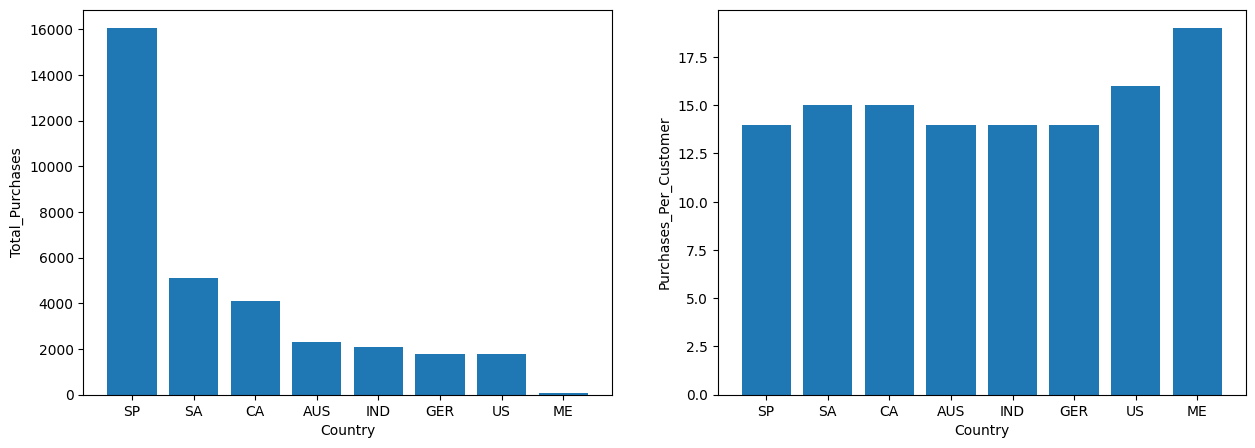

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.bar(x = average_purchases_per_country['Country'],
        height = average_purchases_per_country['Total_Purchases'])
ax1.set_xlabel('Country', fontsize=10)
ax1.set_ylabel('Total_Purchases', fontsize='medium')

ax2.bar(x = average_purchases_per_country['Country'],
       height = average_purchases_per_country['Purchases_Per_Customer'])
ax2.set_xlabel('Country', fontsize=10)
ax2.set_ylabel('Purchases_Per_Customer', fontsize='medium')

plt.show()

**1- Which products are performing the best, and which are performing the least in terms of revenue?**

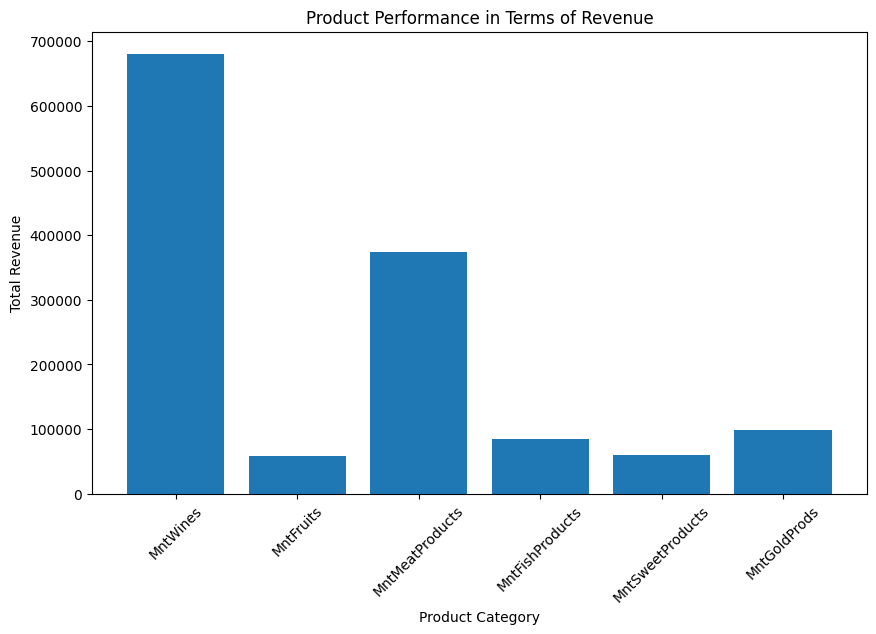

In [ ]:
# QUSTION 8

# Calculate the total revenue for each product category
products = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
total_revenue = df[products].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(products, total_revenue)
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.title("Product Performance in Terms of Revenue")
plt.xticks(rotation=45)
plt.show()



**2 - Is there any pattern between the age of customers and the last campaign acceptance rate?**

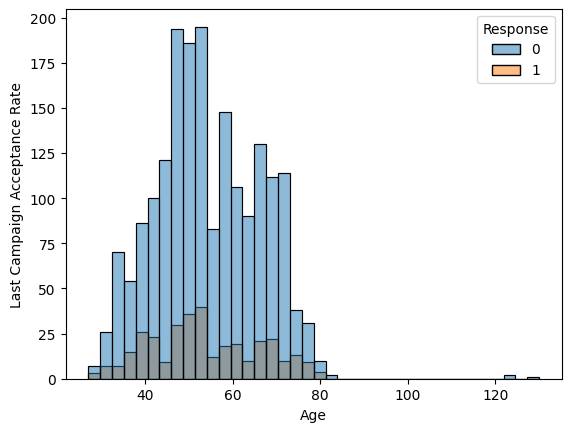

In [ ]:
age = df.groupby('Age').mean()['Response']
sns.histplot(x= df.Age , hue= df['Response'])

plt.xlabel('Age')
plt.ylabel('Last Campaign Acceptance Rate')
plt.show()

**3 - Which Country has the greatest number of customers who accepted the last campaign?**

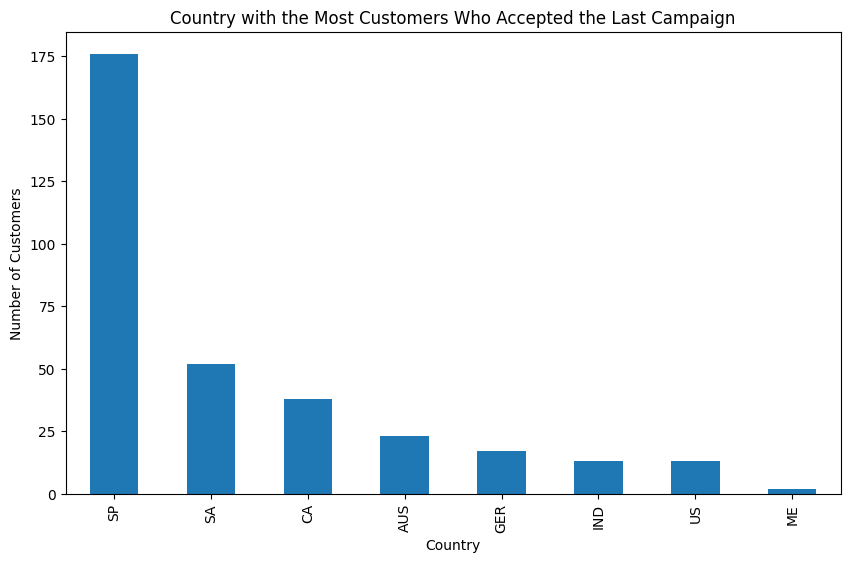

In [ ]:
# Count the number of customers who accepted the last campaign in each country
country_acceptance_counts = df[df["Response"] == 1]["Country"].value_counts()

# Create a bar chart or pie chart
plt.figure(figsize=(10, 6))
country_acceptance_counts.plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.title("Country with the Most Customers Who Accepted the Last Campaign")
plt.show()

**4 -Do you see any pattern in the no. of children at home and total spend?**

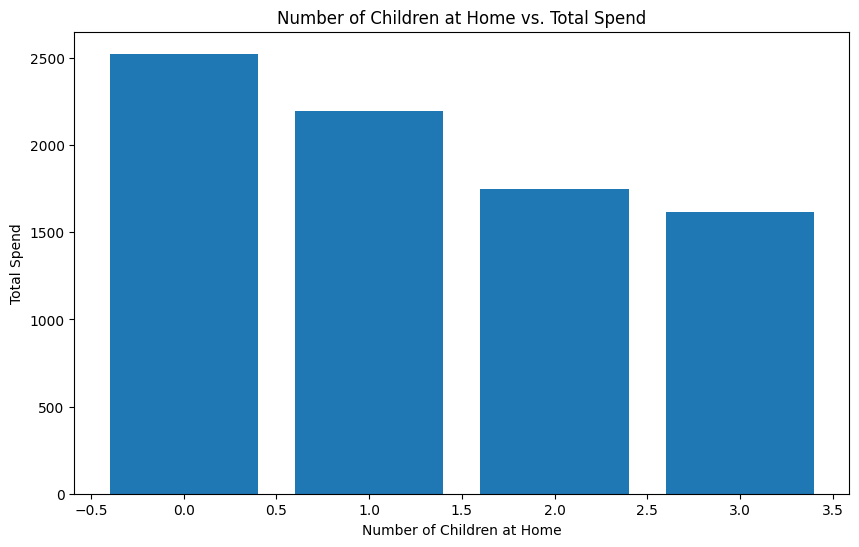

In [ ]:
# Create a scatter plot # o	Do you see any pattern in the no. of children at home and total spend?
plt.figure(figsize=(10, 6))
plt.bar(df["Kidhome"] + df["Teenhome"], df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"])
plt.xlabel("Number of Children at Home")
plt.ylabel("Total Spend")
plt.title("Number of Children at Home vs. Total Spend")
plt.show()


**5 - Education background of the customers who complained in the last 2 years.**

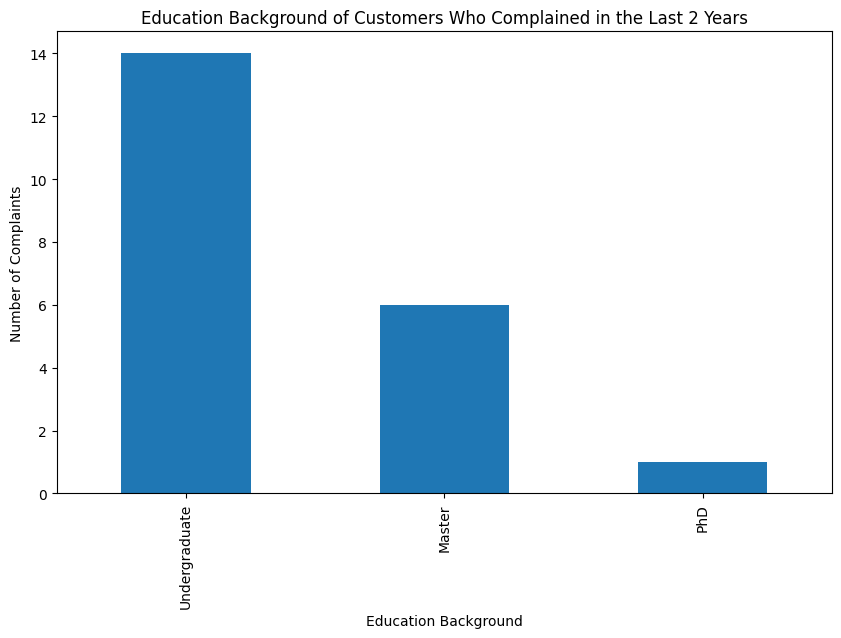

In [ ]:
# Count the number of complaints by education background
complaints_by_education = df[df["Complain"] == 1]["Education"].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
complaints_by_education.plot(kind="bar")
plt.xlabel("Education Background")
plt.ylabel("Number of Complaints")
plt.title("Education Background of Customers Who Complained in the Last 2 Years")
plt.show()


In [ ]:
complained = df[df['Complain'] == 1].groupby('Education').count().reset_index().sort_values(by='Education')
fig = px.bar(complained, x='Education', y='ID', title='Education Background of Customers Who Complained in the Last 2 Years')
fig.show()